# Image classification

Now you will build a network for classifying images in the CIFAR-10 dataset. You will do so using the Keras API, which, as you will see, makes the whole process _extremely_ simpler! (In fact, Tensorflow is officially adopting Keras as its standard API now with the launch of its version 2.0). But you don't really understand how TF works unless you've run it "bare-bones", so hopefully the previous tutorials were helpful to give you an idea of how the TF computation graph is implemented.

Acknowledgement: parts of this tutorial were adapted from the excellent tutorials in the [Hvass-Labs](https://github.com/Hvass-Labs/TensorFlow-Tutorials) page (highly recommended! also available on YouTube).

## Flowchart

The chart below shows the steps in the deep network that will be implemented in this tutorial. Our model will have two convolutional layers, two fully-connected layers and finally a softmax classification layer:

In [ ]:
from IPython.display import Image
Image('Q4-model.png') #image created with http://alexlenail.me/NN-SVG/

## Imports

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
import time
import os

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

## Load Data

The CIFAR-10 data-set is about 163 MB and will be downloaded if it is not already located in the  datasets path (~/.keras/datasets/).

In [3]:
from tensorflow.python.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #load dataset into ~/.keras/datasets/

#printout shapes of train and test data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


__Q: How many traning and test examples are there? What shape is each image in the datset? How many different classes are there?__

In [4]:
max(y_train)

array([9], dtype=uint8)

In [5]:
#YOUR CODE/ANSWER HERE
N_train = 50000
N_test = 10000
img_shape = (32, 32, 3) #use a tuple in the fomat: (height, width, n_channels)
n_classes = 9

print(N_train,N_test,img_shape,n_classes)



50000 10000 (32, 32, 3) 9


__Q: Plot the first 5 training examples of each class as subplots in an__`n_classes` __-by-5 grid. Name each class and put your class names in a list__ `class_names`__.__

['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


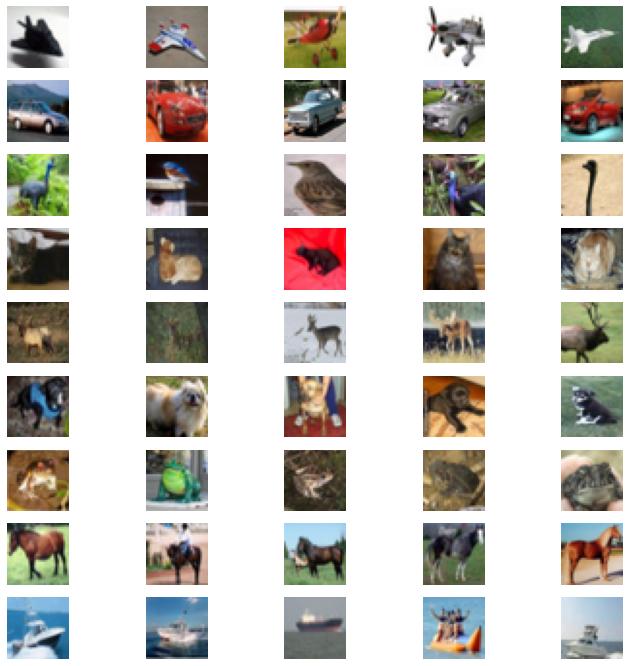

In [6]:
#YOUR CODE/ANSWER HERE
some_images = []
# #your plotting code here
for i in range(n_classes):
    count = 0
    index = 0
    count_total = 0
    while count < 5:
        if i  == y_train[index]:
            some_images.append(x_train[index])
            count += 1
        index += 1
        
fig, axs = plt.subplots(nrows = n_classes, ncols = 5, figsize = (12,12))
for i, ax in enumerate(axs.flatten()):
    img = some_images[i]
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog','horse','ship','truck']
print (class_names)

__Now convert the class numbers in__ `y_train` __and__ `y_test` __into one-hot encoded arrays. Use the function__ `tf.keras.utils.to_categorical`__.__

*Hint:* run `?tf.keras.utils.to_categorical` in a separate notebook cell to open up the docs for this function, or simply hit `shift+tab` twice once your cursor is inside the parentheses in `tf.keras.utils.to_categorical(...)`.

In [7]:
?tf.keras.utils.to_categorical

In [8]:
#YOUR CODE/ANSWER HERE
y_train = tf.keras.utils.to_categorical(y_train,dtype='int')
y_test = tf.keras.utils.to_categorical(y_test,dtype='int')

In [9]:
y_test.shape

(10000, 10)

Now you will start building your network model. We will use the Sequential Model class for that. More info [here](https://keras.io/getting-started/sequential-model-guide/).

In [10]:
# Start construction of the Keras Sequential model.
model = Sequential()

# Input layer for setting the shape of the input images
model.add(InputLayer(input_shape=img_shape,))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())
# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(256, activation='relu'))

# Second fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(n_classes + 1, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

Learn more about Adam and other gradient descent-based methods here:
    http://ruder.io/optimizing-gradient-descent/index.html

In [12]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate = 1e-4) #lr sets the learning rate (default: .001)

The next step is compiling your model using the optimizer chosen above. You should set the loss function to be used, together with any metrics you might want computed after each training step. More info on metrics [here](https://keras.io/metrics/).

In [13]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Believe it or not, after these simple and intuitive steps, your network model is ready to be trained! Use the `fit` method, passing the inputs `x`, desired outputs `y`, and setting the number of `epochs` and `batch_size`. (Be careful: if you choose too large a batch size, your machine might get really slow if it runs short of RAM -- if that happens, simply choose smaller batches.)


In [14]:
model.fit(x=x_train,
          y=y_train,
          epochs=4, batch_size=100)

Epoch 1/4
500/500 [==============================] - 51s 102ms/step - loss: 2.5797 - accuracy: 0.3452
Epoch 2/4
500/500 [==============================] - 49s 97ms/step - loss: 1.4264 - accuracy: 0.4964
Epoch 3/4
500/500 [==============================] - 49s 98ms/step - loss: 1.2317 - accuracy: 0.5669
Epoch 4/4
500/500 [==============================] - 50s 99ms/step - loss: 1.0920 - accuracy: 0.6162


Another method available for the Sequential model class is `evaluate`. This runs your network in "test mode" without updating any weights (no backprop), while evaluating any metrics that have been set for the model.

In [15]:
result = model.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model.metrics_names, result):
    print(name, value)

313/313 [==============================] - 2s 7ms/step - loss: 1.1751 - accuracy: 0.5900
loss 1.1751422882080078
accuracy 0.5899999737739563


That wasn't a great accuracy. Let's keep training it for a couple more epochs with larger batches and see if we can improve it:

In [16]:
#we don't start over: the training continues from the point where it stopped last time
model.fit(x=x_train,
          y=y_train,
          epochs=2, batch_size=150)

Epoch 1/2
334/334 [==============================] - 48s 142ms/step - loss: 0.9528 - accuracy: 0.6665
Epoch 2/2
334/334 [==============================] - 48s 145ms/step - loss: 0.8840 - accuracy: 0.6918


In [17]:
result = model.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model.metrics_names, result):
    print(name, value)

313/313 [==============================] - 2s 7ms/step - loss: 1.1249 - accuracy: 0.6115
loss 1.1249494552612305
accuracy 0.6115000247955322


That is slightly better. Let's be happy with what we have for now and save out current trained model.

In [18]:
#This is how you save your model for later use. It will keep the current learned set of weights.
model_path = 'modelweights.keras'
model.save(model_path) #save the weights only -- 
# can reload them with model.load_weights(model_path) 

#This other option saves the entire model: layers + weights
from tensorflow.python.keras.models import save_model
model_path = 'fullmodel.keras'
save_model(model,model_path)

# (And this is how you load a previously saved model:)
# from tensorflow.python.keras.models import load_model
# model_path = 'fullmodel.keras'
# model = load_model(model_path)

Now let's take a look at what kinds of images the network wasn't able to correctly classify. we can use `predict` to get the network output for a given input set of images:

In [19]:
y_pred = model.predict(x=x_test)

In [20]:
y_pred

array([[2.1915114e-02, 7.9619624e-03, 7.8859709e-02, ..., 8.3070612e-03,
        2.3988561e-01, 6.6824206e-03],
       [2.4641877e-01, 2.8244880e-01, 6.6286942e-04, ..., 1.5988800e-05,
        3.2761431e-01, 1.4273949e-01],
       [7.0187800e-02, 8.6518556e-02, 2.0745180e-03, ..., 4.3337682e-04,
        8.2836068e-01, 1.0905680e-02],
       ...,
       [1.8521945e-03, 4.9390297e-07, 1.8385798e-01, ..., 3.0053189e-02,
        1.3341276e-05, 2.9141793e-04],
       [9.8650334e-03, 1.4889370e-01, 2.1513025e-01, ..., 8.7982014e-02,
        1.4149262e-04, 9.3365548e-04],
       [4.8773893e-04, 1.4497498e-03, 1.2139028e-03, ..., 9.6012104e-01,
        3.5601704e-05, 2.5067211e-03]], dtype=float32)

__Q: Plot 16 examples of images in the test set that are incorrectly classified. Label them by their true class and the class predicted by the network (use your__ `class_names` __list for naming the classes!). Use subplots on a 4-by-4 grid.__

In [21]:
# YOUR CODE HERE

# Negate the boolean array.

    correct = (cls_true == cls_pred)
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = images_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])
    
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize = (12,12))
for i, ax in enumerate(axs.flatten()):
    img = incorrect
    _images[i]
    ax.imshow(img, cmap = 'viridis')
    ax.axis('off')

IndentationError: unexpected indent (<ipython-input-21-9c52067d2677>, line 5)

### Visualization of Layer Weights and Outputs

In order to access the layers in your network, it might be helpful to print out a summary of your model.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

We count the indices to get the layers we want.
The first conv layer has index 0.

In [23]:
layer_conv1 = model.layers[0] 

The second convolutional layer has index 2.

In [24]:
layer_conv2 = model.layers[2] 

Once we have the layers, easily get to their current weights with `get_weights()`.

In [25]:
weights_conv1, bias_conv1 = layer_conv1.get_weights()

#alway check whether the shapes make sense!
weights_conv1.shape,bias_conv1.shape

((5, 5, 3, 64), (64,))

__Q: Get the weights the second conv layer now.__

In [26]:
# TODO
weights_conv2, bias_conv2 = layer_conv1.get_weights()

#alway check whether the shapes make sense!
weights_conv2.shape,bias_conv2.shape

((5, 5, 3, 64), (64,))

Note that the filters in the first conv layer have a non-unitary third dimension, due to the input images being color-images (3 channels: R,G,B). So, you can either plot each channel separately or combine the three into a color image: but you need to convert the values into integers within the range 0-255 (note that, for weights in the second layer, of course you only have the former option!).

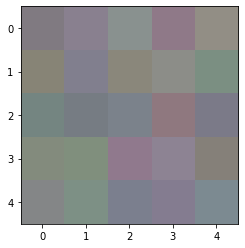

In [27]:
w = weights_conv1[:,:,:,0]
#find min and max vals
min_w, max_w = w.min(), w.max()
#put into 0-1 range, then scale by 255 and cast to unsigned int
w = (255*(w - min_w / (max_w - min_w))).astype('uint8')
plt.imshow(w)

__Q: Plot some of filters for the first and second conv layers.__

_(you can try setting `interpolation='gaussian'` in `imshow` to see if the appearance of the filters improve with a little blurring)_

Text(0.5, 0.98, 'Filters in Layer 2')

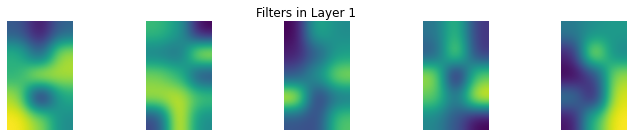

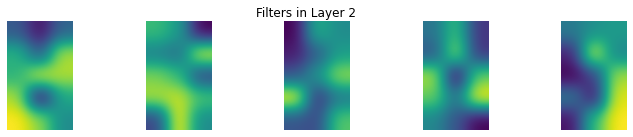

In [28]:
# YOUR CODE HERE
w2 = weights_conv2[:,:,:,0]
#find min and max vals
min_w2, max_w2 = w2.min(), w2.max()
#put into 0-1 range, then scale by 255 and cast to unsigned int
w2 = (255*(w2 - min_w2 / (max_w2 - min_w2))).astype('uint8')
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = w[i]
    ax.imshow(img,interpolation='gaussian')
    ax.axis('off')
fig.suptitle('Filters in Layer 1')

fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    img = w2[i]
    ax.imshow(img,interpolation='gaussian')
    ax.axis('off')
fig.suptitle('Filters in Layer 2')


### Plotting the output of a convolutional layer

For this, we will use the `K` backend function which will create a function from a part of your Keras model. (It's actually less complicated than it sounds!)

In [29]:
from tensorflow.python.keras import backend as K

#since layer_conv1 is the first real layer in our model (index 0),
# the input to layer_conv1 are the actual input images
output_conv1 = K.function(inputs=[layer_conv1.input], 
                          outputs=[layer_conv1.output])

In [30]:
#pick an image from the test set to feed it to the network
im1 = x_test[0]

#put the image inside a list since the layer expects a 4-d input tensor as input
out1 = output_conv1(np.array([im1]))[0] 
out1.shape

(1, 32, 32, 64)

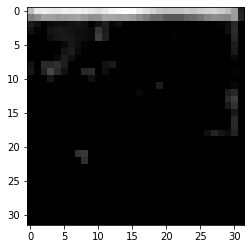

In [31]:
plt.imshow(out1[0,:,:,31],cmap='gray')

__Q: Plot some outputs for the second conv layer.__

In [32]:
layer_conv2.input

<KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [33]:
layer_conv1.input

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_1')>

Text(0.5, 0.98, 'Outputs for Layer 2')

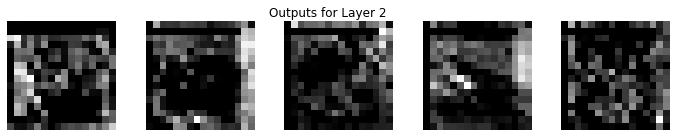

In [34]:
# YOUR CODE HERE
from tensorflow.python.keras import backend as K

output_conv2 = K.function(inputs=[layer_conv1.input], 
                          outputs=[layer_conv2.output])

fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (12,2))
for i , ax in enumerate(axs.flatten()):
    im = x_test[i]
    out  = output_conv2(np.array([im]))[0] 
    ax.imshow(out[0,:,:,31],cmap='gray')
    ax.axis('off')
fig.suptitle('Outputs for Layer 2')


### Compute maximally-activating images using Keras

The function below will compute max images in a very similar way to what was done in Q4, except now using the Keras backend. Make sure you understand it! We also use a separate function to convert the optimized input array into a reasonable image format.

In [43]:
from tensorflow.python.keras import backend as K

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    # (this trick helps to make it look like a "real" image)
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    # make sure pixel values are in the correct range
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def compute_max_image(input_img_placeholder,layer_output,
                      epochs=20,step=1.):
    loss = K.mean(layer_output)

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img_placeholder)[0]

    # normalization trick: normalizing the gradient with its root-mean-square
    # avoids very small and very large gradients and ensures a smooth gradient ascent process.
    grads /= (K.sqrt(K.mean(K.square(grads))) + K.epsilon()) #RMS

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img_placeholder], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = (np.random.random((1, img_shape[0], img_shape[1], img_shape[2]))-.5).astype(np.float32) * 20 + 128.
    
    # run gradient ascent for e.g. 20 steps
    for _ in range(epochs):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    # decode the resulting input image          
    img = input_img_data[0]
    img = deprocess_image(img)
    return loss_value,img

In [44]:
## Debugging note: .gradients is drepracted in TF2 - Replace gradients with GradientTape as suggested here https://github.com/tensorflow/tensorflow/issues/33135
#Let's generate some max images for layer_conv1
mylayer = layer_conv1

filt_indices = range(16)
res = []
for filter_index in filt_indices:
    print(filter_index,end=" ")

    layer_output = mylayer.output[:, :, :, filter_index]
    
    input_img = model.inputs[0]

    loss, img = compute_max_image(input_img,layer_output)
    print(" loss:",loss)
    res.append(img)
    

0 

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

In [ ]:
def plot_image_ax(image,ax):
    ax.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='gray')
r,c = 4,4
filt_indices = range(r*c)
f,axes = plt.subplots(r,c,figsize=(c*1.5,r*1.5))
f.subplots_adjust(wspace=.2,hspace=.2)
plt.suptitle('First 16 filters of conv_layer_1',size=16)
for ax_i,img in enumerate(res):
    ax = axes.ravel()[ax_i]
    plot_image_ax(img,ax)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()  

__Q. Plot maximally-activating images for generated layer_conv1. Do the same for layer_conv2. (Remember, none of these are unique, so by running the code again you might get different examples, corresponding to reaching different local maxima with gradient ascent.)__

In [ ]:
# YOUR CODE HERE

## Finding an input that maximizes a specific class

__Q. Now generate maximal images for each class (optimize the final output of the network, as you did in Q4).__

In [ ]:
# YOUR CODE HERE

__Q. _OPTIONAL:_ This [post](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) from the Keras blog shows a more sofisticated strategy for generating maximal images, where we start with a small image and slowly grow its dimensions until it reaches the actual size. Feel free to use their code and see if you get better images. A heads up: you will need to change the input_shape of your Input layer to allow for variable-sized images (simply use__ `None`__),.__

In [ ]:
# YOUR CODE HERE